0314 3주차 자연어처리 <br>
기본적인 신경망 모델에 관한 수업

<b>Machine Learning 모델을 만드는 기준 (2가지를 다 만족해야함!)<br></b>
<span style="color: #2D3748; background-color:#fff5b1;">1) data와 패턴이 주어지고</span><br>
<span style="color: #2D3748; background-color:#fff5b1;">2) 수학적, 물리적인 공식으로 도출해낼 수 없는 경우</span>


ex) Detecting potential fraud in credit card charges, Determining the optimal cycle for traffic lights in a busy intersection

<b>Components of learning: formalization</b>

<span style="color: #2D3748; background-color:#fff5b1;">input, feature 들을 input space </span>라고 칭함. ex) x= (x1, x2, x3, x4, x5, ...) <br>
output space, 결과값 ex) y= +1, =1 (in Binary Classification)

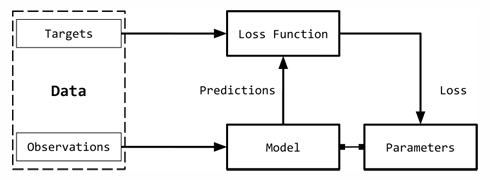

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline

In [ ]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        return torch.sigmoid(self.fc1(x_in))

# Activation function
## Sigmoid
is one of the earliest used activation functions in neural network history.
takes any real value and squashes it into the range between 0 and 1. 
Mathematically, the sigmoid function is expressed as follows:

$𝑓(𝑥)=\frac{1}{1+e^{-𝑥}} $

PyTorch implements the sigmoid as `torch.sigmoid()`

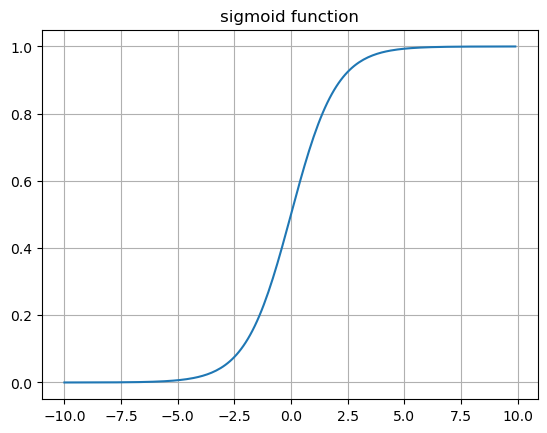

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = torch.arange(-10., 10., 0.1)
y = torch.sigmoid(x)
plt.plot(x, y)
plt.grid(True)
plt.title("sigmoid function")
# x = np.arange(-10., 10., 0.1)
# y = 1 / (1 + np.exp(-x))
# plt.plot(x, y)

plt.show()

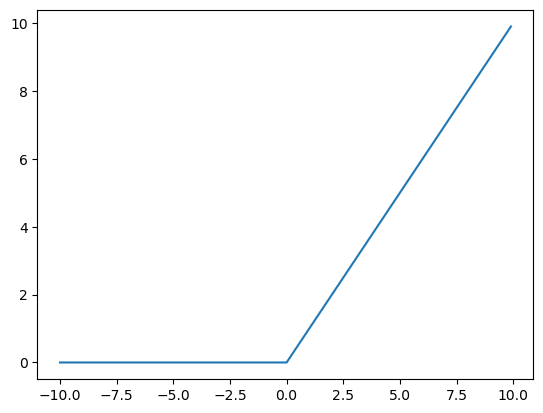

In [12]:
relu = torch.nn.ReLU()
x = torch.arange(-10., 10., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

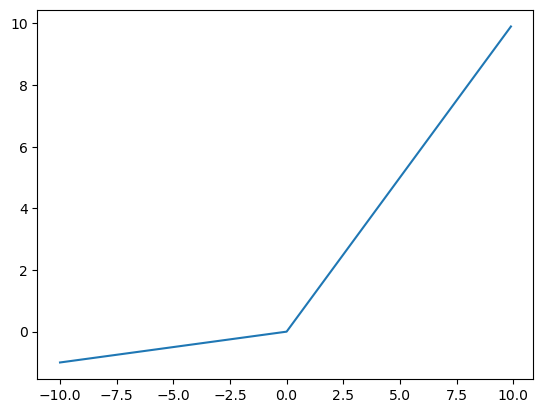

In [13]:
leakyRelu = torch.nn.LeakyReLU(negative_slope=0.1)
x = torch.arange(-10., 10., 0.1)
y = leakyRelu(x)
plt.plot(x, y)
plt.show()

In [30]:
# multi-classification 모델의 final layer activiation fuction!
softmax = torch.nn.Softmax(dim=1)
# randn(a, b): (a, b)모양의 tensor (정규분포)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-1.9776,  0.8423, -1.1040]])
tensor([[0.0496, 0.8317, 0.1188]])
tensor([1.])


In [19]:
mse_loss = torch.nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.8615, grad_fn=<MseLossBackward0>)


In [47]:
# multi-categorical classification에서 각 샘플이 여러 범주에 속하는
# 즉 [1, 0, 1, 0] 과 같은 target_output도 충분히 가능할 수 있다!
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probablities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)

loss = bce_loss(probablities, targets)
print(probablities)
print(targets)
print(loss)

tensor([[0.6019],
        [0.3701],
        [0.6794],
        [0.5583]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [0.],
        [1.],
        [0.]])
tensor(0.5434, grad_fn=<BinaryCrossEntropyBackward0>)
